In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from datetime import timedelta

import cmweather
import numpy as np
import pandas as pd
import xarray as xr
import glob

from bokeh.models.formatters import DatetimeTickFormatter
import hvplot.xarray
import holoviews as hv
hv.extension("bokeh")

import act
import pyart

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Set your username and token here!
username = 'username'
token = 'token'

# Set the datastream and start/enddates
datastream = 'gucaoppsap1flynn1hS2.c1'
startdate = '2022-05-22'
enddate = '2022-05-22'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] gucaoppsap1flynn1hS2.c1.20220522.003000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Flynn, C., Shilling, J., & Flynn, C. Aerosol Optical Properties
(AOPPSAP1FLYNN1H). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1369241



In [3]:
ds = act.io.read_arm_netcdf(result)

ds

<xarray.Dataset> Size: 17kB
Dimensions:                             (time: 24, bound: 2)
Coordinates:
  * time                                (time) datetime64[ns] 192B 2022-05-22...
Dimensions without coordinates: bound
Data variables: (12/174)
    base_time                           datetime64[ns] 8B 2022-05-22
    time_offset                         (time) datetime64[ns] 192B 2022-05-22...
    time_bounds                         (time, bound) object 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    Bs_B_1um                            (time) float32 96B dask.array<chunksize=(24,), meta=np.ndarray>
    qc_Bs_B_1um                         (time) int32 96B dask.array<chunksize=(24,), meta=np.ndarray>
    Bs_G_1um                            (time) float32 96B dask.array<chunksize=(24,), meta=np.ndarray>
    ...                                  ...
    qc_supermicron_AAE_BR               (time) int32 96B dask.array<chunksize=(24,), meta=np.ndarray>
    supermicron_AAE_GR                  (time) float32 96B dask.array<chunksize=(24,), meta=np.ndarray>
    qc_supermicron_AAE_GR               (time) int32 96B dask.array<chunksize=(24,), meta=np.ndarray>
    lat                                 float32 4B ...
    lon                                 float32 4B ...
    alt                                 float32 4B ...
Attributes: (12/21)
    command_line:                    aopavg -n aoppsapavg -s guc -f S2 -b 202...
    Conventions:                     ARM-1.2
    process_version:                 vap-aopavg-1.0-0.el7
    dod_version:                     aoppsap1flynn1h-c1-1.2
    input_datastreams:               gucaoppsap1flynn1mS2.c1 : 1.3 : 20220522...
    site_id:                         guc
    ...                              ...
    doi:                             10.5439/1369241
    history:                         created by user dsmgr on machine flint a...
    _file_dates:                     ['20220522']
    _file_times:                     ['003000']
    _datastream:                     gucaoppsap1flynn1hS2.c1
    _arm_standards_flag:             1

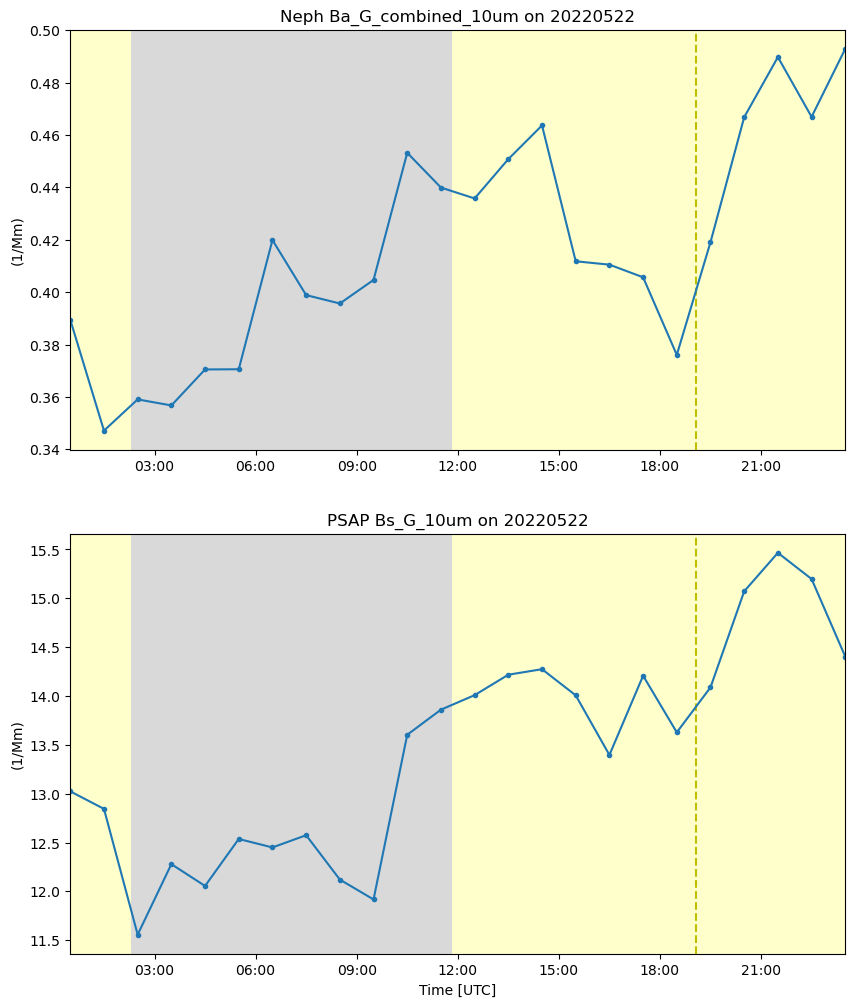

In [4]:
# First, for many of the ACT QC features, we need to get the dataset more to CF standard and that
# involves cleaning up some of the attributes and ways that ARM has historically handled QC
ds.clean.cleanup()

display = act.plotting.TimeSeriesDisplay({'PSAP': ds, 'Neph': ds},
                                         subplot_shape=(2,), figsize=(10,12))
# Apply corrections for the ceilometer, correcting for the vertical height
#ds = act.corrections.correct_mpl(ds_mpl)

# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
#display = act.plotting.TimeSeriesDisplay(ds, figsize=(10, 5), subplot_shape=(1,))

# Plot up the variable in the first plot
display.plot('Ba_G_combined_10um', dsname='Neph', subplot_index=(0,))
display.day_night_background(dsname='Neph', subplot_index=(0,))

display.plot('Bs_G_10um',dsname='PSAP', subplot_index=(1,))
display.day_night_background(dsname='PSAP',subplot_index=(1,))
#display.plot('Ba_G_combined_10um', subplot_index=(0,))

# Plot up the QC variable in the second plot
#display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

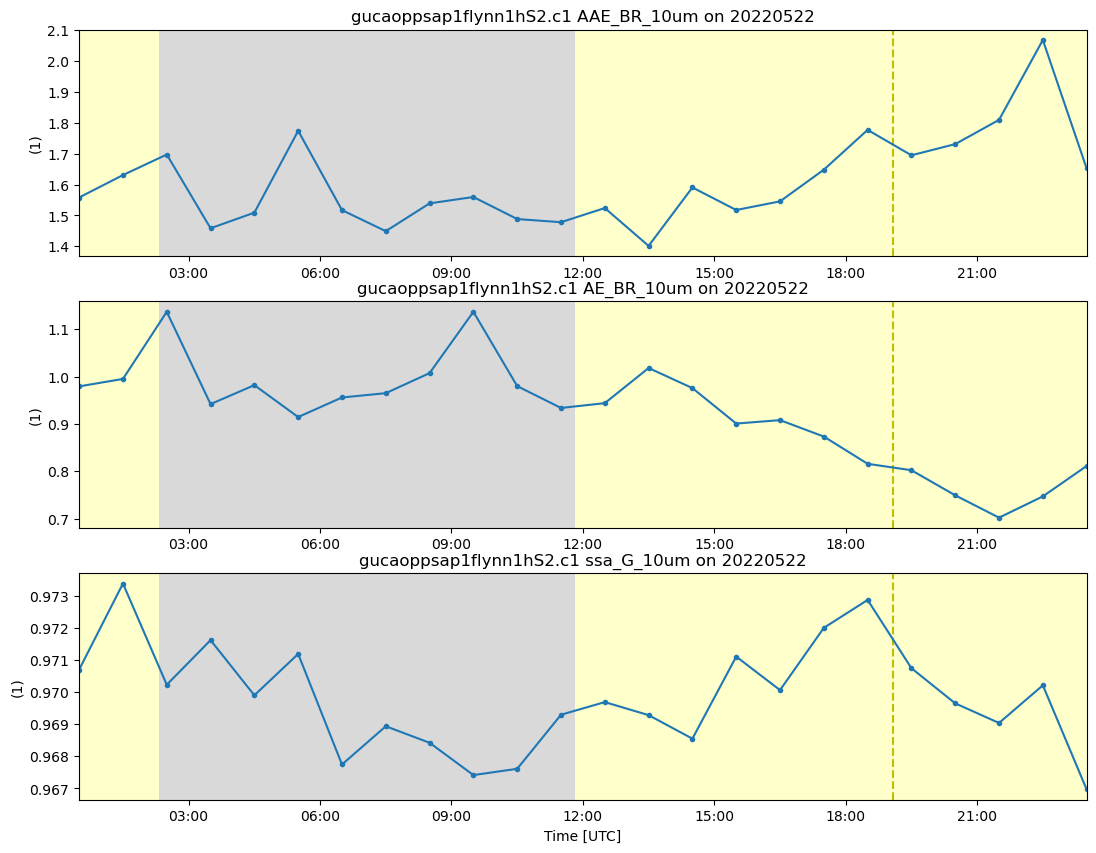

In [5]:
display = act.plotting.TimeSeriesDisplay(ds, figsize=(13, 10), subplot_shape=(3,))
display.plot('AAE_BR_10um', subplot_index=(0,))
display.day_night_background(subplot_index=(0,))

display.plot('AE_BR_10um', subplot_index=(1,))
display.day_night_background(subplot_index=(1,))

display.plot('ssa_G_10um', subplot_index=(2,))
display.day_night_background(subplot_index=(2,))
